# Resumes & The Job Application Process

An increasing number of companies these days are using [Applicant Tracking Systems](https://en.wikipedia.org/wiki/Applicant_tracking_system) some popular examples (at the time of writing) being [lever](https://www.lever.co/) & [greenhouse](https://grow.greenhouse.io)

Many of these provide aggegrate summary views of candidates and job description fit based on keyword analysis and other techniques to aid in pre-screening, in a classic cat & mouse game there are now services where candidates can optimize their resumes against a job description specifically to game these systems such as [skillsyncer](https://skillsyncer.com/)

This jupyter notebook is a light hearted analysis of my resume, there are an exhaustive number of services that can do this far more thoroughly if you want to get serious about it

I used [pandoc](https://pandoc.org/) to convert my resume from latex to text eg.

```bash
$ pandoc Resume-ClintPlummer_ENMR-2020.tex -o Resume_ClintPlummer_ENMR-2020.txt
```

## Word Cloud

Simple word cloud based on the content of my resume

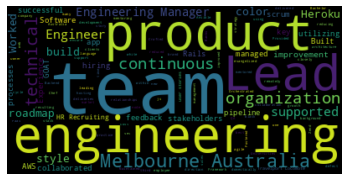

In [16]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

file_handle = open('./Resume_ClintPlummer_ENMR.txt', 'r')

word_cloud = WordCloud().generate(file_handle.read())

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Achievement Summary

My top achievement for each company ranked using [Latent_semantic_analysis](https://en.wikipedia.org/wiki/Latent_semantic_analysis)

In [48]:
from TexSoup import TexSoup
from TexSoup.data import RArg
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
import re

SUMY_LANGUAGE = "english"
SUMY_SENTENCES_COUNT = 1

file_handle = open('./Resume_ClintPlummer_ENMR.tex','r')

soup = TexSoup(file_handle)

experience_section = list(soup.find_all('cvsect'))[1]

company_achievements = {}

for entry in experience_section.entrylist.find_all('entry'):
    date_location, title, company, achievements = entry.args
    
    if company.value not in company_achievements:
        company_achievements[company.value] = ""
 
    # FIXME: Cleanup the output, there must be a much more elegant way to do this through
    # the underlying lib
    cleaned_achievements = achievements.value.strip()
    cleaned_achievements = cleaned_achievements.replace("\&", "&")
    cleaned_achievements = re.sub(r"\s\s+", ' ', cleaned_achievements)
    cleaned_achievements = cleaned_achievements.replace("\\par\medskip ", "\n\n")

    company_achievements[company.value] += cleaned_achievements
    
stemmer = Stemmer(SUMY_LANGUAGE)

summarizer = Summarizer(stemmer)
summarizer.stop_words = get_stop_words(SUMY_LANGUAGE)

for key,value in company_achievements.items():
   parser = PlaintextParser.from_string(value, Tokenizer(SUMY_LANGUAGE))

   print(key)
   for sentence in summarizer(parser.document, SUMY_SENTENCES_COUNT):
       print(sentence)
       print("\n")


GOAT
Lead, recruited & managed a team of 15 comprising of iOS (Swift) / Android (Kotlin) / Backend Engineers (Ruby/Golang Microservices) both co-located and remote, building a brand new yet unreleased app for GOAT


Travelport Locomote
Facilitated growth of the company from 5 - 50 employee’s through formulation & articulation of the vision and goals to scrum teams via story mapping sessions, five whys, kick off's, pair programming & mentoring & improvements to documentation & processes


Alliance Software
Helped build relationships with clients to ensure quality outcomes & manage expectations




## Title Frequency Distribution

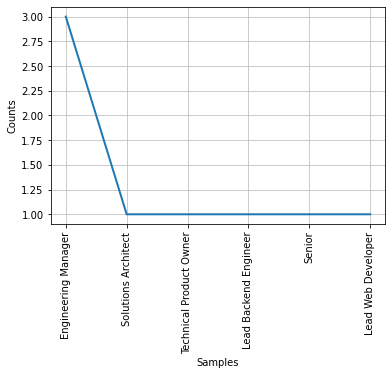

In [38]:
from TexSoup import TexSoup
from TexSoup.data import RArg
import nltk

file_handle = open('./Resume_ClintPlummer_ENMR.tex','r')

soup = TexSoup(file_handle)

experience_section = list(soup.find_all('cvsect'))[1]
titles = []

for entry in experience_section.entrylist.find_all('entry'):
    date_location, title, company, achievements = entry.args
    
    [titles.append(t.strip()) for t in title.value.split('/')]


freq = nltk.FreqDist(titles)
freq.plot(20, cumulative=False)